In [1]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights
from torchvision.io import read_image
import torch
from torchvision.utils import draw_keypoints
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F



person_int = read_image('../data/Three_running_people.jpg')

weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

person_float = transforms(person_int)

model = keypointrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model([person_float])
print(outputs)

[{'boxes': tensor([[1118.4772,  181.0458, 1356.0696,  763.0206],
        [ 578.2856,  218.0375,  851.5649,  904.7484],
        [ 815.2865,  149.6586, 1011.6744,  742.6548],
        [1518.9888,  245.6241, 1541.5743,  278.8791],
        [1510.4586,  241.7540, 1533.1809,  272.7232]],
       grad_fn=<StackBackward0>), 'labels': tensor([1, 1, 1, 1, 1]), 'scores': tensor([0.9999, 0.9999, 0.9996, 0.3696, 0.1794], grad_fn=<IndexBackward0>), 'keypoints': tensor([[[1.2001e+03, 2.3110e+02, 1.0000e+00],
         [1.2174e+03, 2.2042e+02, 1.0000e+00],
         [1.1988e+03, 2.1775e+02, 1.0000e+00],
         [1.2492e+03, 2.3377e+02, 1.0000e+00],
         [1.1921e+03, 2.2977e+02, 1.0000e+00],
         [1.2797e+03, 2.9784e+02, 1.0000e+00],
         [1.1882e+03, 2.9651e+02, 1.0000e+00],
         [1.3275e+03, 3.6859e+02, 1.0000e+00],
         [1.1921e+03, 3.6592e+02, 1.0000e+00],
         [1.2705e+03, 3.9128e+02, 1.0000e+00],
         [1.1563e+03, 3.9128e+02, 1.0000e+00],
         [1.2665e+03, 4.7404e+02,

In [2]:
kpts = outputs[0]['keypoints']
scores = outputs[0]['scores']

detect_threshold = 0.75
idx = torch.where(scores > detect_threshold)
keypoints = kpts[idx]

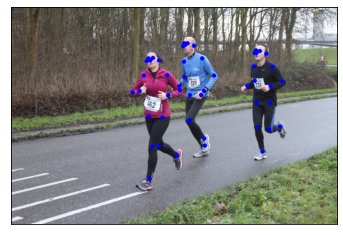

In [3]:
plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

res = draw_keypoints(person_int, keypoints, colors="blue", radius=10)
show(res)

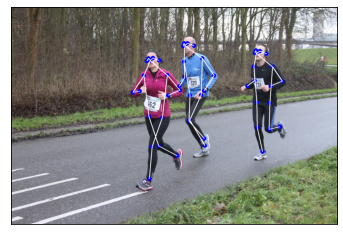

In [4]:
connect_skeleton = [
    (0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (6, 8),
    (7, 9), (8, 10), (5, 11), (6, 12), (11, 13), (12, 14), (13, 15), (14, 16)
]

res = draw_keypoints(person_int, keypoints, connectivity=connect_skeleton, colors="blue", radius=10, width=4)
show(res)

In [5]:
res.to(torch.uint8)

tensor([[[ 62,  62,  60,  ..., 142, 182, 207],
         [ 72,  76,  80,  ..., 123, 135, 131],
         [ 94, 101, 113,  ..., 165, 154, 135],
         ...,
         [112, 122, 133,  ...,  98,  88, 102],
         [117, 124, 130,  ..., 103,  96,  99],
         [123, 126, 127,  ..., 109, 111,  98]],

        [[ 57,  57,  53,  ..., 147, 185, 210],
         [ 67,  71,  73,  ..., 128, 138, 134],
         [ 87,  94, 106,  ..., 168, 157, 138],
         ...,
         [113, 123, 132,  ..., 120, 110, 125],
         [118, 125, 129,  ..., 126, 119, 122],
         [122, 125, 126,  ..., 133, 135, 124]],

        [[ 53,  53,  47,  ..., 153, 192, 217],
         [ 61,  65,  65,  ..., 134, 145, 141],
         [ 77,  84,  96,  ..., 175, 164, 145],
         ...,
         [118, 128, 138,  ...,  48,  38,  53],
         [123, 130, 135,  ...,  54,  47,  50],
         [128, 131, 132,  ...,  59,  61,  50]]], dtype=torch.uint8)

In [11]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights
from torchvision.transforms import transforms as transforms
from torchvision.io import read_image
import torchvision
import torch
from torchvision.utils import draw_keypoints
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

import matplotlib

# pairs of edges for 17 of the keypoints detected ...
# ... these show which points to be connected to which point ...
# ... we can omit any of the connecting points if we want, basically ...
# ... we can easily connect less than or equal to 17 pairs of points ...
# ... for keypoint RCNN, not  mandatory to join all 17 keypoint pairs
edges = [
    (0, 1), (0, 2), (2, 4), (1, 3), (6, 8), (8, 10),
    (5, 7), (7, 9), (5, 11), (11, 13), (13, 15), (6, 12),
    (12, 14), (14, 16), (5, 6)
]

def draw_keypoints_and_boxes(outputs, image):
    # the `outputs` is list which in-turn contains the dictionary 
    for i in range(len(outputs[0]['keypoints'])):
        # get the detected keypoints
        keypoints = outputs[0]['keypoints'][i].cpu().detach().numpy()
        # get the detected bounding boxes
        boxes = outputs[0]['boxes'][i].cpu().detach().numpy()

        # proceed to draw the lines and bounding boxes 
        if outputs[0]['scores'][i] > 0.9: # proceed if confidence is above 0.9
            keypoints = keypoints[:, :].reshape(-1, 3)
            for p in range(keypoints.shape[0]):
                # draw the keypoints
                cv2.circle(image, (int(keypoints[p, 0]), int(keypoints[p, 1])), 
                            3, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
            # draw the lines joining the keypoints
            for ie, e in enumerate(edges):
                # get different colors for the edges
                rgb = matplotlib.colors.hsv_to_rgb([
                    ie/float(len(edges)), 1.0, 1.0
                ])
                rgb = rgb*255
                # join the keypoint pairs to draw the skeletal structure
                cv2.line(image, (int(keypoints[e, 0][0]), int(keypoints[e, 1][0])),
                        (int(keypoints[e, 0][1]), int(keypoints[e, 1][1])),
                        tuple(rgb), 2, lineType=cv2.LINE_AA)

            # draw the bounding boxes around the objects
            cv2.rectangle(image, (int(boxes[0]), int(boxes[1])), (int(boxes[2]), int(boxes[3])),
                          color=(0, 255, 0), 
                          thickness=2)
        else:
            continue

    return image


In [14]:
from PIL import Image
import cv2

device = 'cpu'

cap = cv2.VideoCapture(0)

cont = 0
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

transform = transforms.Compose([
    transforms.ToTensor() 
])


def get_model(min_size=800):
    # initialize the model
    model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True,
                                                                   num_keypoints=17, 
                                                                   min_size=min_size)

    return model


model = get_model().to(device).eval()

while True:
    ret, frame = cap.read()     #ret is a flag that indicates if the frame has been captured
    frame = cv2.resize(frame, None, fx=1., fy=1., interpolation=cv2.INTER_AREA)

    pil_image = Image.fromarray(frame).convert('RGB')
    image = transform(pil_image)
    image.unsqueeze(0).to(device)
    outputs = model([image])
    output_image = draw_keypoints_and_boxes(outputs, frame)

    cv2.putText(frame, "OpenCV - press ESC to exit", (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
    
    cv2.imshow('Input', output_image)

    c = cv2.waitKey(1)
    if c == 27:
        break       #27 is ascii for ESC
    

cap.release()
cv2.destroyAllWindows()